In [3]:
import requests
import pandas as pd


api_key = '16cb6cb4'


search = 'Night'


movie_data = []


page = 1

while True:

    url = f'http://www.omdbapi.com/?apikey={api_key}&s={search}&page={page}&'
    
 
    response = requests.get(url)
 
    if response.status_code == 200:
        data = response.json()

        if data['Response'] == 'True':
            movie_data.extend(data['Search'])
            

            if int(data['totalResults']) <= len(movie_data):
                break
            
            if page>100:
                break

            page += 1
        else:
            # Если нет фильмов
            break
    else:
        # Если запрос не успешен
        break

movies_df = pd.DataFrame(movie_data)
movies_df.head

<bound method NDFrame.head of                                                Title  Year     imdbID   Type  \
0                                Night at the Museum  2006  tt0477347  movie   
1                                         Game Night  2018  tt2704998  movie   
2     Night at the Museum: Battle of the Smithsonian  2009  tt1078912  movie   
3                                   30 Days of Night  2007  tt0389722  movie   
4                                 Last Night in Soho  2021  tt9639470  movie   
...                                              ...   ...        ...    ...   
1005                            One Hot Summer Night  1998  tt0145942  movie   
1006                                       Night Owl  1993  tt0107681  movie   
1007                     Everything Happens at Night  1939  tt0031285  movie   
1008                           A Scream in the Night  1935  tt0026971  movie   
1009                              Summer Night Fever  1978  tt0078340  movie   

         

In [7]:
#Пришлось разделить изза ограничений на колличество запросов и общей скорости работы
full_movie_data = []

# Перебор всех фильмов в movies_df
for index, row in movies_df.iterrows():
    # Получение ID фильма
    movie_id = row['imdbID']
    
    
    url = f'http://www.omdbapi.com/?apikey={api_key}&i={movie_id}&plot=full'
    
   
    response = requests.get(url)

    if response.status_code == 200:
        # Добавление полных данных о фильме в список
        full_movie_data.append(response.json())
    else:
        # Если запрос не успешен, пропускаем этот фильм
        continue

# Создание нового DataFrame с полными данными о фильмах
full_movies_df = pd.DataFrame(full_movie_data)
full_movies_df.head(10)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons
0,Night of the Living Dead,1968,R,04 Oct 1968,96 min,"Horror, Thriller",George A. Romero,"John A. Russo, George A. Romero","Duane Jones, Judith O'Dea, Karl Hardman",Barbra and Johnny visit their father's grave i...,...,7.8,"139,830",tt0063350,movie,N/A,"$236,452",N/A,N/A,True,NaN
1,Run All Night,2015,R,13 Mar 2015,114 min,"Action, Crime, Thriller",Jaume Collet-Serra,Brad Ingelsby,"Liam Neeson, Ed Harris, Joel Kinnaman",Professional Brooklyn hit-man Jimmy Conlon is ...,...,6.6,"115,342",tt2199571,movie,N/A,"$26,461,644",N/A,N/A,True,NaN
2,It Comes at Night,2017,R,09 Jun 2017,91 min,"Drama, Horror, Mystery",Trey Edward Shults,Trey Edward Shults,"Joel Edgerton, Christopher Abbott, Carmen Ejogo",Secure within a desolate home as an unnatural ...,...,6.2,"103,695",tt4695012,movie,N/A,"$13,985,117",N/A,N/A,True,NaN
3,Saturday Night Fever,1977,R,16 Dec 1977,118 min,"Drama, Music",John Badham,"Nik Cohn, Norman Wexler","John Travolta, Karen Lynn Gorney, Barry Miller",Nineteen-year-old Brooklyn native Tony Manero ...,...,6.8,"88,095",tt0076666,movie,N/A,"$94,213,184",N/A,N/A,True,NaN
4,Two Night Stand,2014,R,26 Sep 2014,86 min,"Comedy, Romance",Max Nichols,Mark Hammer,"Miles Teller, Lio Tipton, Jessica Szohr",After an extremely regrettable one night stand...,...,6.3,"74,047",tt2140619,movie,N/A,"$18,612",N/A,N/A,True,NaN
5,Rough Night,2017,R,16 Jun 2017,101 min,Comedy,Lucia Aniello,"Lucia Aniello, Paul W. Downs","Scarlett Johansson, Kate McKinnon, Zoë Kravitz",Five best friends from college reunite 10 year...,...,5.2,"56,050",tt4799050,movie,N/A,"$22,105,643",N/A,N/A,True,NaN
6,Late Night,2019,R,14 Jun 2019,102 min,"Comedy, Drama",Nisha Ganatra,Mindy Kaling,"Emma Thompson, Mindy Kaling, John Lithgow",Katherine Newbury (Dame Emma Thompson) is a pi...,...,6.5,"40,986",tt6107548,movie,N/A,"$15,499,454",N/A,N/A,True,NaN
7,Into the Night,2020–2021,TV-MA,01 May 2020,N/A,"Drama, Sci-Fi, Thriller",N/A,Jason George,"Pauline Etienne, Laurent Capelluto, Mehmet Kur...",When radiation from the sun causes a global di...,...,7.0,"36,397",tt10919486,series,NaN,NaN,NaN,NaN,True,2
8,The Strangers: Prey at Night,2018,R,09 Mar 2018,85 min,Horror,Johannes Roberts,"Bryan Bertino, Ben Ketai","Christina Hendricks, Martin Henderson, Bailee ...",A family's road trip takes a dangerous turn wh...,...,5.3,"35,850",tt1285009,movie,N/A,"$24,586,708",N/A,N/A,True,NaN


In [ ]:
full_movies_backup=full_movies_df

In [39]:

# Удаление пропущенных значений Year
full_movies_df = full_movies_df[full_movies_df['Year'].notnull()]
full_movies_df['imdbRating'] = full_movies_df['imdbRating'].apply(lambda x: float(x))
# Добавление новых столбцов
full_movies_df['Release_Year'] = full_movies_df['Year']+' год'

full_movies_df.head(5)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Release_Year
0,Night of the Living Dead,1968,R,04 Oct 1968,96 min,"Horror, Thriller",George A. Romero,"John A. Russo, George A. Romero","Duane Jones, Judith O'Dea, Karl Hardman",Barbra and Johnny visit their father's grave i...,...,"139,830",tt0063350,movie,N/A,"$236,452",N/A,N/A,True,NaN,1968 год
1,Run All Night,2015,R,13 Mar 2015,114 min,"Action, Crime, Thriller",Jaume Collet-Serra,Brad Ingelsby,"Liam Neeson, Ed Harris, Joel Kinnaman",Professional Brooklyn hit-man Jimmy Conlon is ...,...,"115,342",tt2199571,movie,N/A,"$26,461,644",N/A,N/A,True,NaN,2015 год
2,It Comes at Night,2017,R,09 Jun 2017,91 min,"Drama, Horror, Mystery",Trey Edward Shults,Trey Edward Shults,"Joel Edgerton, Christopher Abbott, Carmen Ejogo",Secure within a desolate home as an unnatural ...,...,"103,695",tt4695012,movie,N/A,"$13,985,117",N/A,N/A,True,NaN,2017 год
3,Saturday Night Fever,1977,R,16 Dec 1977,118 min,"Drama, Music",John Badham,"Nik Cohn, Norman Wexler","John Travolta, Karen Lynn Gorney, Barry Miller",Nineteen-year-old Brooklyn native Tony Manero ...,...,"88,095",tt0076666,movie,N/A,"$94,213,184",N/A,N/A,True,NaN,1977 год
4,Two Night Stand,2014,R,26 Sep 2014,86 min,"Comedy, Romance",Max Nichols,Mark Hammer,"Miles Teller, Lio Tipton, Jessica Szohr",After an extremely regrettable one night stand...,...,"74,047",tt2140619,movie,N/A,"$18,612",N/A,N/A,True,NaN,2014 год


In [37]:
full_movies_df= full_movies_backup
full_movies_df.head(5)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Release_Year
0,Night of the Living Dead,1968,R,04 Oct 1968,96 min,"Horror, Thriller",George A. Romero,"John A. Russo, George A. Romero","Duane Jones, Judith O'Dea, Karl Hardman",Barbra and Johnny visit their father's grave i...,...,"139,830",tt0063350,movie,N/A,"$236,452",N/A,N/A,True,NaN,1968
1,Run All Night,2015,R,13 Mar 2015,114 min,"Action, Crime, Thriller",Jaume Collet-Serra,Brad Ingelsby,"Liam Neeson, Ed Harris, Joel Kinnaman",Professional Brooklyn hit-man Jimmy Conlon is ...,...,"115,342",tt2199571,movie,N/A,"$26,461,644",N/A,N/A,True,NaN,2015
2,It Comes at Night,2017,R,09 Jun 2017,91 min,"Drama, Horror, Mystery",Trey Edward Shults,Trey Edward Shults,"Joel Edgerton, Christopher Abbott, Carmen Ejogo",Secure within a desolate home as an unnatural ...,...,"103,695",tt4695012,movie,N/A,"$13,985,117",N/A,N/A,True,NaN,2017
3,Saturday Night Fever,1977,R,16 Dec 1977,118 min,"Drama, Music",John Badham,"Nik Cohn, Norman Wexler","John Travolta, Karen Lynn Gorney, Barry Miller",Nineteen-year-old Brooklyn native Tony Manero ...,...,"88,095",tt0076666,movie,N/A,"$94,213,184",N/A,N/A,True,NaN,1977
4,Two Night Stand,2014,R,26 Sep 2014,86 min,"Comedy, Romance",Max Nichols,Mark Hammer,"Miles Teller, Lio Tipton, Jessica Szohr",After an extremely regrettable one night stand...,...,"74,047",tt2140619,movie,N/A,"$18,612",N/A,N/A,True,NaN,2014


In [49]:
# Подсчет количества фильмов по жанрам
genre_movies_df = full_movies_df['Genre'].str.split(', ').explode()
genre_counts = genre_movies_df.value_counts()
print("Количество фильмов по жанрам:")
print(genre_counts)
# Подсчет среднего рейтинга фильмов
avg_rating = full_movies_df['imdbRating'].mean()
print(f"\nСредний рейтинг фильмов: {avg_rating:.2f}")

# Поиск фильмов с наивысшим рейтингом
top_rated_movies = full_movies_df.nlargest(5, 'imdbRating')
print("\nФильмы с наивысшим рейтингом:")
print(top_rated_movies[['Title', 'imdbRating']])


Количество фильмов по жанрам:
Genre
Drama       4
Horror      3
Thriller    3
Comedy      3
Action      1
Crime       1
Mystery     1
Music       1
Romance     1
Sci-Fi      1
Name: count, dtype: int64

Средний рейтинг фильмов: 6.41

Фильмы с наивысшим рейтингом:
                      Title  imdbRating
0  Night of the Living Dead         7.8
7            Into the Night         7.0
3      Saturday Night Fever         6.8
1             Run All Night         6.6
6                Late Night         6.5


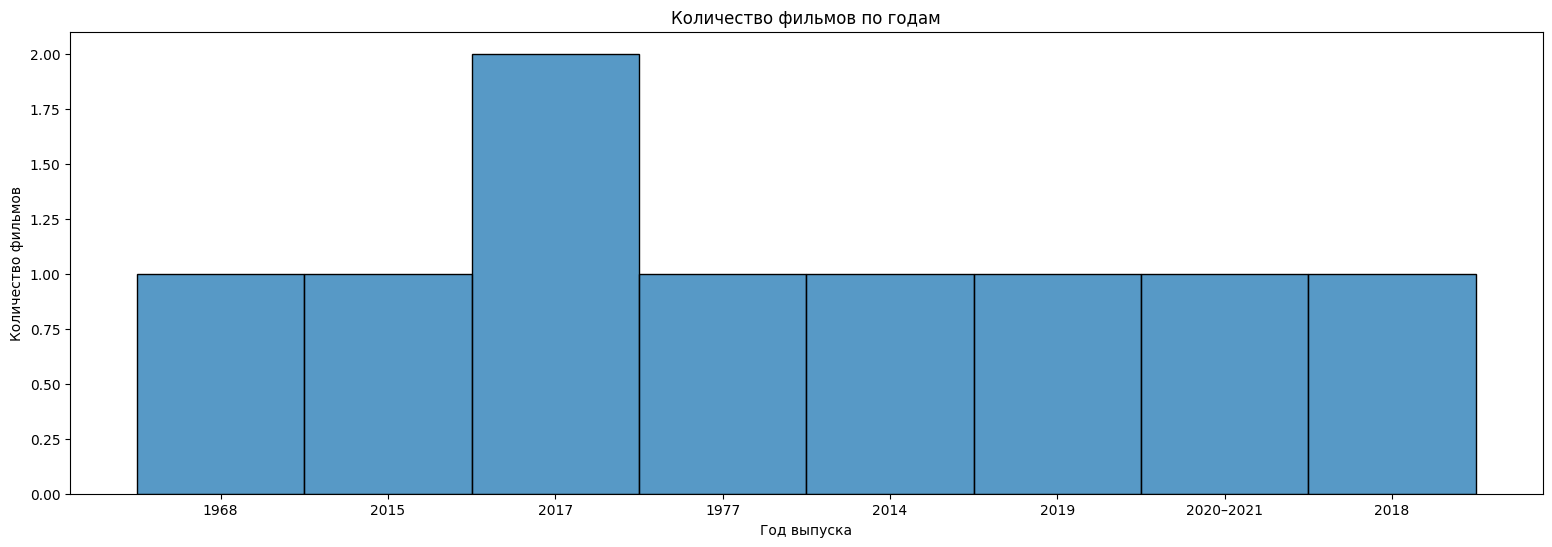

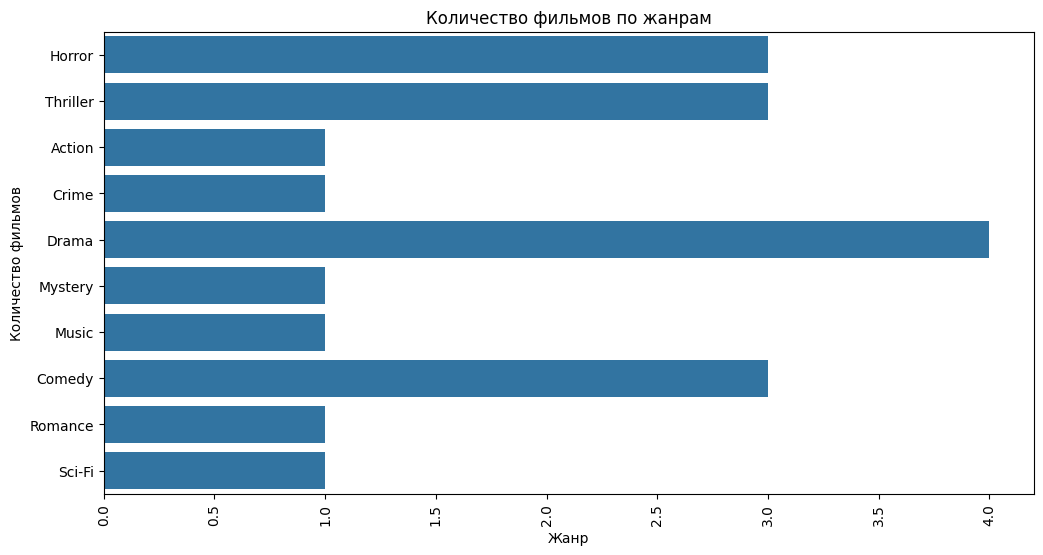

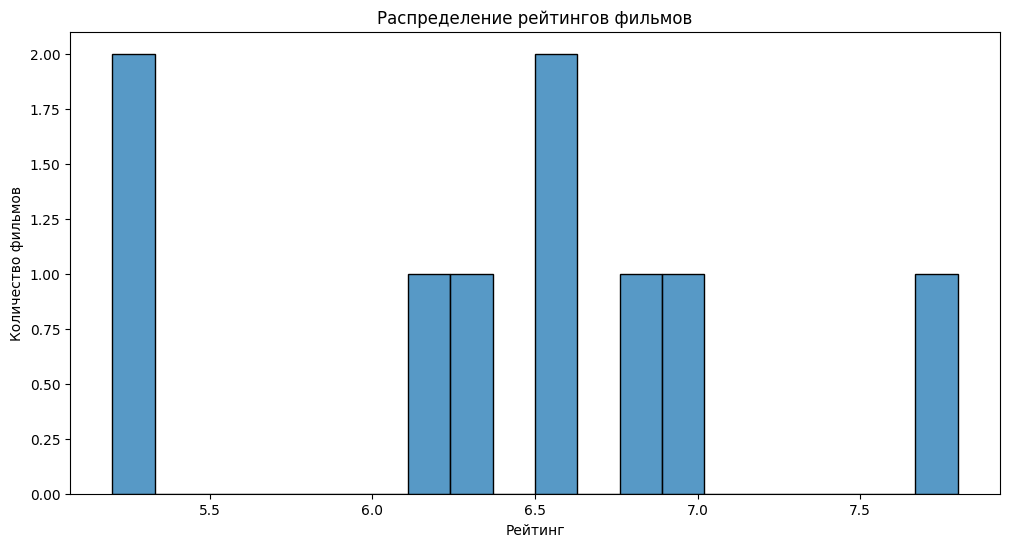

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# Гистограмма количества фильмов по годам
plt.figure(figsize=(19, 6))
sns.histplot(full_movies_df['Year'], bins=40)
plt.title('Количество фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.show()

# Гистограмма количества фильмов по жанрам

plt.figure(figsize=(12, 6))
sns.countplot(genre_movies_df)
plt.title('Количество фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=90)
plt.show()

# График распределения рейтингов фильмов
plt.figure(figsize=(12, 6))
sns.histplot(full_movies_df['imdbRating'], bins=20)
plt.title('Распределение рейтингов фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()